# Продвинутый Python, лекция 6

**Лектор:** Петров Тимур

**Семинаристы:** Петров Тимур, Бузаев Федор, Коган Александра, Дешеулин Олег

**Spoiler Alert:** в рамках курса нельзя изучить ни одну из тем от и до досконально (к сожалению, на это требуется больше времени, чем даже 3 часа в неделю). Но мы попробуем рассказать столько, сколько возможно :)

Итак, сегодня поговорим про такую важную составляющую для любого Python-разработчика: обработка исключений, тестирование и логирование

На 1 курсе мы уже обсуждали исключения, но немного напомним и чуть поглубже погрузимся в устройство. Приступим!

# Исключения

Итак, что такое вообще исключения и зачем нам все это нужно?

У вас есть код, он работает, все бы славно, да вот могут происходить ситуации, когда логика кода нарушается (самый простой и базовый случай - деление на ноль):

In [ ]:
print(1 / 0)

ZeroDivisionError: ignored

Отлично, код упал, все рухнуло, ваш сервис потерял кучу денег из-за падения. Неприятно, надо что-то делать. Вот как в этом случае нам помогают исключения и их обработка. Базово: конструкция try-except:

![](https://studyglance.in/python/images/try-except-else.jpg)

In [ ]:
try:
    print(1 / 0)
except :
    print("error")
else:
    print("it's fine bro")
finally:
    print("end")

print('-' * 30)

try:
    print(1 / 1)
except :
    print("error")
else:
    print("it's fine bro")
finally:
    print("end")

error
end
------------------------------
1.0
it's fine bro
end


Можно ли специально вывести ошибку? Конечно можно (это помогает в тех условиях, где у вас получаются уже не те результаты, например, и вы хотите их отдельно разобрать по-другому)

Делается это с помощью raise:

In [ ]:
try:
    a = int(input())
    if a <= 1:
        raise NameError
except NameError:
    print("raised error")

1
raised error


Какие бывают исключения?



![](https://s1.o7planning.com/ru/11421/images/7601427.png)

Всегда ли стоит использовать исключения? Не всегда, особенно, когда можно предотврарить их на этапе кода (пробуем замерить время выполнения двух идентичных програм: с обработкой исключений и с простым if)

Получается в 10 раз медленнее!

In [ ]:
import timeit

setup="a = 0"

stmt1 = '''
try:
    b=10 / a
except ZeroDivisionError:
    pass
'''

stmt2 = '''
if a != 0:
    b = 10 / a
'''

print("time with Exception \n",timeit.timeit(stmt1,setup,number=10000))
print("time with if \n",timeit.timeit(stmt2,setup,number=10000))

time with Exception 
 0.004722453999988829
time with if 
 0.0005154149999953006


# Логирование

Одна из вещей, которая ходит рядом с обработкой ошибок - это логирование, которое нужно, дабы следить за работой. Ведь если мы даже ошибку обработали, код работает, все славно, сам факт наличия ошибки может нас о чем-нибудь предупредить...

Тем более, что в продовых системах вы не сделаете простой ```print()```.


Логи должны быть:

1. Наглядными - позволяют разработчику быстро получать информацию о работе системы и обнаруживать потенциальные проблемы еще до того, как они станут серьезными.
2. Контекстными - включают в себя не только запись логов в хронологическом порядке, но и анализ этих логов для выявления связей и зависимостей между событиями.
3. Реактивными - фокусируется на событиях, которые приводят к возникновению определенного типа лога.

## Уровни логгирования

Логи также делются по уровням релевантности:

Внутри бибилиотеки существует 5 уровней логирования (в скобочках - уровень критичности, чем выше - тем больше крит):

* ```DEBUG``` (10) - отладка, когда происходит не совсем важное и  не нужно выдавать весь контекст информации.

* ```INFO``` (20) - вывод данных, когда происходит что-то важное и нужно выдавать информацию

* ```WARNING``` (30) - предупреждение (и дефолтный уровень логирования), когда произошло что-то странное, но не сломало операцию.

* ```ERROR``` (40) - произошла какая-то ошибка, требуется устранить по-быстрее

* ```CRITICAL``` (50) - случилось что-то оооочень плохое и требует немедленного вмешательства (даже в 5 утра воскресенья или в новый год)

Каждый из них - это своя функция (по дефолту в консоли вы увидите только сообщения уровня ```WARNING``` и выше)

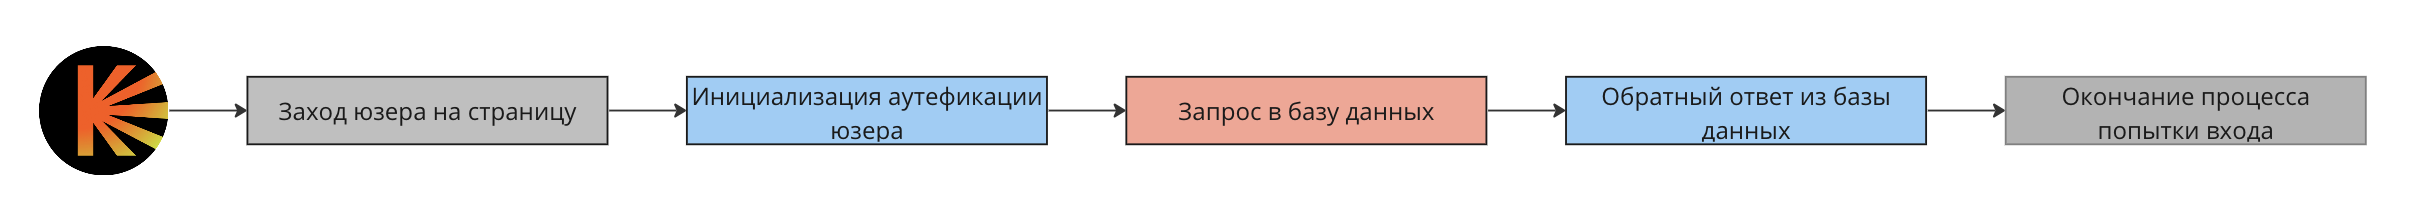

Различные этапы стоит логгировать по-разному. Например «Запрос в базу данных» стоит логгировать с уровнем ```ERROR```, так как это самый значимый этап в пути аутефикации юзера.

Где:

Серый - это ```DEBUG```;

Голубой - это ```INFO```;

Красный - это ```ERROR```;

## Инициализация логгера

In [ ]:
import logging

In [ ]:
logging.debug("Debugging")
logging.info("Information")
logging.warning("Warning")
logging.error("ERROR")
logging.critical("Wake up bitch, production is broken")

ERROR:root:ERROR
CRITICAL:root:Wake up bitch, production is broken


Видим ```Уровень логгирования:какой-то root:сообщение```

Что такое root?

Это название логгера (по дефолту logger называется root)

Итак, а теперь представим, что у нас большой проект. А это значит несколько модулей как минимум. Понятное дело, что иметь для них один логер - дело плохое, хочется иметь каждый для себя. Давайте создавать несколько подобных. Чтобы создать отдельный логер, используем getLogger(), который принимает в себя название логгера. По дефолту это root, можно назвать самостоятельно, но принято называть __ name __ (то есть по названию модуля). Если же сделать везде одинаково, то ничего понятно не будет...

Что важно знать при создании собственного логера? А то, что в нем есть несколько частей:

* Logger - сам логгер, который будет все делать (посылка сообщений)

* Handler - часть логгера, которая отвечает за обработку посланных сообщений (что и куда)

* Formatter - форматирование сообщения (как правильно вывести)

* Filter - дополнительно можно фильтровать сообщения (что выводить, а что не выводить)

Давайте на примере соберем:


In [ ]:
logger = logging.getLogger("logger_name")

In [ ]:
logger.debug("Debugging")
logger.info("Information")
logger.warning("Warning")
logger.error("ERROR")
logger.critical("Wake up bitch, production is broken")

ERROR:logger_name:ERROR
CRITICAL:logger_name:Wake up bitch, production is broken


В данном выводе мы можем увидеть:

```Уровень логгирования:имя логгера:сообщение```

И также мы можем увидеть, что не вывелись сообщения с первым и вторыми уровнями логгирования. Давайте исправим это:

In [ ]:
logger.setLevel(logging.DEBUG) # поставить уровень, с которого мы что-либо логируем

logger.debug("Debugging")
logger.info("Information")
logger.warning("Warning")
logger.error("ERROR")
logger.critical("Wake up bitch, production is broken")

DEBUG:logger_name:Debugging
INFO:logger_name:Information
ERROR:logger_name:ERROR
CRITICAL:logger_name:Wake up bitch, production is broken


Задание имени логгеру - важная часть эффективного логгирования, так как это позволяет легче идентифицировать, отслеживать и анализировать записи в журналах. Вот несколько рекомендаций по заданию имени логгеру:

1. **Используйте описательные имена**: Имя логгера должно быть описательным и четким. Оно должно отражать контекст или компонент приложения, который генерирует логи. Например, если у вас есть веб-приложение, вы можете назвать логгер "web_app_logger".

2. **Соблюдайте структуру иерархии**: Если ваша система имеет иерархию компонентов, используйте иерархическую структуру для именования логгеров. Например, "web_app_logger.database" для логирования действий, связанных с базой данных внутри вашего веб-приложения.

4. **Избегайте избыточной сложности**: Не создавайте слишком длинные и сложные имена логгеров. Имя логгера должно быть информативным, но не избыточным.

5. **Учитывайте контекст и цель логирования**: Имя логгера должно отражать контекст, в котором происходит логирование, и цель, с которой это происходит. Например, если логируются операции с оплатой, то имя логгера может быть связано с оплатой, например, "payment_logger".

6. **Используйте согласованный подход**: Важно, чтобы в вашем проекте использовался согласованный подход к именованию логгеров, чтобы все разработчики следовали одним и тем же правилам.

Примеры хороших имен логгеров могут быть:

    "main_app_logger" для основного логгера приложения.
    "authentication_logger" для логгера, отвечающего за аутентификацию.
    "order_processing_logger" для логгера, связанного с обработкой заказов в интернет-магазине.

Избегайте неинформативных имен типа "Logger1" или "LoggerA", так как они могут затруднить понимание, какие события логируются в журналах.


Давайте соединим наш обработчик исключений с логгером:

In [ ]:
try:
    n = int(input("Please enter an integer: "))
    res = 1 / n
    logger.info(f"Successful call: {n}, the result is {res}")
except (ZeroDivisionError, ValueError) as e:
    logger.error(e, exc_info=True) # Последнее - вывести сообщение из консоли, которое мы получаем
    logger.exception(e) # Можно вот так еще
finally:
    logger.info("Programm is ended")

Please enter an integer: 1


INFO:logger_name:Successful call: 1, the result is 1.0
INFO:logger_name:Programm is ended


## Handler

Handler – это специальный модуль, который управляет  выводом или сохранением логов в различные места, такие как консоль, файлы, удаленные серверы и другие места назначения. Он определяет, какие сообщения логгировать, в каком формате и куда отправлять.

Наиболее часто используемые [хендлеры](https://docs.python.org/3/library/logging.handlers.html):

1. **StreamHandler**: Этот хендлер выводит логи в поток, обычно в стандартный вывод (stdout) или стандартный поток ошибок (stderr). Это полезно для вывода логов на консоль.

2. **FileHandler**: Этот хендлер записывает логи в файл. Вы можете указать имя файла, куда следует записывать логи, и его формат.

3. **RotatingFileHandler**: Этот хендлер записывает логи в файл, но также обеспечивает ротацию лог-файлов, чтобы предотвратить переполнение диска. Вы можете указать максимальный размер файла и количество ротированных файлов.

4. **TimedRotatingFileHandler**: Этот хендлер аналогичен RotatingFileHandler, но ротация происходит на основе времени, а не размера файла.

5. **SocketHandler**: Этот хендлер отправляет логи по сети на удаленный сервер, где они могут быть централизованно сохранены и анализированы.

6. **SMTPHandler**: Этот хендлер отправляет логи через электронную почту на заданный адрес, что может быть полезно для мониторинга и оповещения об ошибках.

7. **NullHandler**: Этот хендлер не выполняет никаких действий и используется для подавления логирования в случае, когда вы хотите отключить логирование в определенном контексте.


Давайте инициализируем наш Handler и добавим его в наш предыдущий код:

In [ ]:
!ls # Проверяем, есть ли логи

sample_data


In [ ]:
handler_for_exceptions = logging.FileHandler(f"{__name__}.log", mode='w') # Инициализация handler'a
logger.addHandler(handler_for_exceptions) # добавление handler'a в логгер

try:
    n = int(input("Please enter an integer: "))
    res = 1 / n
    logger.info(f"Successful call: {n}, the result is {res}")
except (ZeroDivisionError, ValueError) as e:
    logger.error(e, exc_info=True) # Последнее - вывести сообщение из консоли, которое мы получаем
    logger.exception(e) # Можно вот так еще
finally:
    logger.info("Programm is ended")

Please enter an integer: 0


ERROR:logger_name:division by zero
Traceback (most recent call last):
  File "<ipython-input-64-a132791c9600>", line 6, in <cell line: 4>
    res = 1 / n
ZeroDivisionError: division by zero
ERROR:logger_name:division by zero
Traceback (most recent call last):
  File "<ipython-input-64-a132791c9600>", line 6, in <cell line: 4>
    res = 1 / n
ZeroDivisionError: division by zero
INFO:logger_name:Programm is ended


In [ ]:
!ls

__main__.log  sample_data


## Formatter

**Formatter** - это специальный модуль, который определяет формат, в котором будут представлены лог-сообщения в логах. Форматтер позволяет настроить, какие части информации будут включены в каждое лог-сообщение, а также как они будут отформатированы. Форматтеры определяют, каким образом информация будет представлена в журнале, чтобы облегчить чтение и анализ логов.

Наиболее часто встречаемые форматтеры:

1. **LogRecord**: Это базовый форматтер, который отформатирует лог-сообщение в виде строки, включая информацию, такую как уровень логирования, имя логгера, время записи и текст сообщения.

2. **SimpleFormatter**: Этот форматтер предоставляет простой и легко читаемый формат сообщений, включая уровень логирования и текст сообщения.

3. **Formatter**: Это кастомизируемый форматтер, который позволяет вам определять собственные шаблоны форматирования. Вы можете указать, какие атрибуты записи (LogRecord) должны быть включены в лог-сообщение и в каком формате.

In [ ]:
handler_for_exceptions = logging.FileHandler(f"{__name__}.log", mode='w') # Инициализация handler'a
handler_for_exceptions.setFormatter(logging.Formatter(fmt="%(asctime)s %(name)s %(levelname)s %(message)s")) # форматирование, https://docs.python.org/3/library/logging.html#logrecord-attributes
logger.addHandler(handler_for_exceptions) # добавление handler'a в логгер

try:
    n = int(input("Please enter an integer: "))
    res = 1 / n
    logger.info(f"Successful call: {n}, the result is {res}")
except (ZeroDivisionError, ValueError) as e:
    logger.error(e, exc_info=True) # Последнее - вывести сообщение из консоли, которое мы получаем
    logger.exception(e) # Можно вот так еще
finally:
    logger.info("Programm is ended")

Please enter an integer: 1


INFO:logger_name:Successful call: 1, the result is 1.0
INFO:logger_name:Programm is ended


## Filter

Filter - это специальный механизм, который позволяет определять условия, при которых логгер будет регистрировать (логировать) события. Фильтры позволяют отбирать логируемые события на основе определенных критериев, что может быть полезным, если вам необходимо выбирать, какие события должны попадать в журнал, а какие нет.

Фильтры могут быть присоединены к логгерам или хендлерам и могут проверять различные атрибуты записи (LogRecord), такие как уровень логирования, имя логгера, сообщение и другие. Если фильтр удовлетворяет заданным условиям, событие будет зарегистрировано, иначе оно будет проигнорировано.

Давайте создадим наш фильтр:

In [ ]:
# Генерация лог-сообщений
logger.debug("Debugging")
logger.info("Information")
logger.warning("Warning")
logger.error("ERROR")
logger.critical("Wake up bitch, production is broken")

DEBUG:logger_name:Debugging
INFO:logger_name:Information
ERROR:logger_name:ERROR
CRITICAL:logger_name:Wake up bitch, production is broken


In [ ]:
# Создание фильтра, который разрешает логгирование только предупреждений и ошибок
class WarningErrorFilter(logging.Filter):
    def filter(self, record):
        return record.levelno >= logging.WARNING

In [ ]:
logger.addFilter(WarningErrorFilter())

# Генерация лог-сообщений c фильтром
logger.debug("Это отладочное сообщение (не будет залогировано)")
logger.info("Это информационное сообщение (не будет залогировано)")
logger.warning("Это предупреждение (будет залогировано)")
logger.error("Это сообщение об ошибке (будет залогировано)")
logger.error("Это сообщение о критической ошибке (будет залогировано)")

ERROR:logger_name:Это сообщение об ошибке (будет залогировано)
ERROR:logger_name:Это сообщение о критической ошибке (будет залогировано)


Что у нас получается? Нужно создавать везде такие логеры, дальше их помнить и с ними работать... Не совсем

Можно и так обойтись, а можно и сделать более извращенно, ведь логгер можно создавать с помощью словаря, сохранить его отдельно в какой-нибудь файле (типа settings) и вытащить оттуда!

Рассмотрим вот эту махину:


```
LOGGING_CONFIG = {
    'version': 1,
    'disable_existing_loggers': False,

    'formatters': {
        'default_formatter': {
            'format': '%(asctime)s %(name)s %(levelname)s %(message)s'
        },
    },

    'handlers': {
        'file_handler': {
            'class': 'logging.FileHandler',
            'formatter': 'default_formatter',
            'filename': 'py_log.log',
            'mode': 'w'
        },
    },

    'loggers': {
        'main': {
            'handlers': ['file_handler'],
            'level': 'INFO',
            'propagate': True
        },
        'division': {
            'handlers': ['file_handler'],
            'level': 'INFO',
            'propagate': True
        },
    }
}
```

А далее в любой ситуации можно сделать вот так:

In [ ]:
loggging.config.dictConfig(LOGGING_CONFIG)
logger = logging.getLogger('main')

# Тестирование

## Зачем нужно тестировать код?

К сожалению или к счастью, тестирование является важной частью промышленной разработки и обеспечения итогового качества:

1. **Выявление ошибок и дефектов**: Основная цель тестирования - обнаружение ошибок и дефектов в программном обеспечении. Это позволяет разРАБам обнаружить и устранить проблемы до того, как они могут повлиять на конечных пользователей.

2. **Повышение надежности**: Тестирование помогает убедиться, что программное обеспечение работает надежно и стабильно в различных условиях. Надежность важна, особенно в критических приложениях, таких как медицинская аппаратура и авионика.

3. **Оценка нагрузки**: Тестирование нагрузки позволяет оценить, как хорошо программное обеспечение работает в различных условиях нагрузки. Это важно, особенно для веб-приложений и систем, работающих с большими объемами данных.

4. **Поддержка изменений и обновлений**: При внесении изменений в существующее программное обеспечение тестирование помогает убедиться, что новые версии не нарушают работу существующих функций.

5. **Экономия времени и ресурсов:** Вовремя обнаруженные и исправленные ошибки обходятся дешевле, чем исправление ошибок, найденных в продакшене или после выпуска продукта.

## Test Driven Development

Test-Driven Development (TDD) - это методология разработки программного обеспечения, которая подразумевает создание тестов перед написанием собственного кода. Процесс TDD описывается тремя основными шагами: "***Red-Green-Refactor***".


1. **Red**: На этом этапе начинают с создания теста, который проверяет новую функциональность или модификацию существующей. Тест пишется так, как если бы функциональность уже существовала, но по факту она ещё не реализована. В результате этого этапа тест будет "провален" (красный), так как ожидаемое поведение ещё не реализовано в коде.

2. **Green**: На этом этапе разработчик создаёт минимальный необходимый код, чтобы сделать тест "проходящим" (зеленый). Цель - сделать так, чтобы тест успешно выполнялся, подтверждая, что функциональность теперь работает правильно.

3. **Refactor**: После того как тест становится "зеленым," можно приступить к улучшению кода. Рефакторинг включает в себя оптимизацию, улучшение читаемости кода, устранение дублирования и т.д. Важно при этом сохранить зеленый статус теста, чтобы убедиться, что изменения не нарушили работу функциональности.


**Главные преимущества TDD!!!!!!!**:

1. **Более надежный код**: Поскольку каждая часть функциональности имеет соответствующий тест, ошибка обнаруживается раньше и легче исправляется.

2. **Документация кода**: Тесты служат в качестве спецификации для кода, описывая ожидаемое поведение.

3. **Способствует разделению кода на мелкие модули**: TDD способствует созданию хорошей архитектуры, так как код разбивается на маленькие, тестируемые модули.

4. **Облегчение рефакторинга**: После TDD рефакторинг можно проводить с уверенностью, что функциональность не нарушится.

5. **Сокращение времени на отладку и исправление ошибок**: Большинство ошибок обнаруживаются и исправляются на этапе разработки, что сокращает затраты на отладку.

6. **Быстрое реагирование на изменения**: TDD позволяет легко внедрять изменения в код, так как у вас уже есть тесты, которые проверяют работу функциональности.

## Животное дня

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Ambystoma_mexicanum_%286337857516%29.jpg/1920px-Ambystoma_mexicanum_%286337857516%29.jpg)

Сегодня у нас известное всем животное - амбистома (и аксолотль)

В чем разница? Аксолотль - это амбистомы до тех пор, пока они не станут взрослыми (то есть это лишь этап). Половозрелые амбистомы выглядят вот так:

![](https://upload.wikimedia.org/wikipedia/commons/0/00/Axolotl_ganz.jpg)

Аксолотль не может самостоятельно стать взрослой, потому что для взросления ей необходим тироксин, которые они сами вообще не вырабатывают (то есть взрослыми они становятся за счет внешних причин, например, засухи)

И для амбистом оставаться аксолотлем, видимо, максимально выгодно!

Аксолотли обладают фантастической способоностью к регенерации - они даже могут мозг регенирировать (не все части, но все-таки), не оставляя на себе никаких шрамов. Поэтому ученые их используют для изучения как идеальную модель

Но к сожалению они вымирают, потому что раньше ацтеки их ели, а потом пришли конкистадоры, естественно, испортили их среду обитания, да и сейчас ситуация еще хуже (из-за загрязнения воды в Мексике)
